Four ways of investigating important features will be:

- using decision trees to see which features are deemed important.
- using correlation obtained in EDA.
- using previous research and medical journals.

In [4]:
# importing dataset
import pandas as pd

diabetes = pd.read_csv ("diabetes.csv")

In [5]:
print(diabetes.shape)
print(diabetes.describe(include='all'))

(70692, 22)
       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       

In [6]:
# splitting data
Ivs = diabetes.drop('Diabetes_binary', axis='columns')
DV = diabetes['Diabetes_binary']
print(DV.head())
print(Ivs.head())

0    0
1    0
2    0
3    0
4    0
Name: Diabetes_binary, dtype: int64
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         0          1   26       0       0                     0   
1       1         1          1   26       1       1                     0   
2       0         0          1   26       0       0                     0   
3       1         1          1   28       1       0                     0   
4       0         0          1   29       1       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             1       0        1  ...              1            0        3   
1             0       1        0  ...              1            0        3   
2             1       1        1  ...              1            0        1   
3             1       1        1  ...              1            0        3   
4             1       1        1  ...              1            0        2  

In [7]:
#importing the tree modelling library

from sklearn import tree

In [11]:
#Splitting data
from sklearn.model_selection import train_test_split

train_Ivs, test_Ivs, train_DV, test_DV = train_test_split(Ivs,DV,test_size=0.3,random_state=51)

In [182]:
#setting up initial model

model = tree.DecisionTreeClassifier()
classtree_noprune=model.fit(train_Ivs, train_DV)

In [183]:
optalpha = classtree.cost_complexity_pruning_path(train_Ivs,train_DV) #finding optimal pruning parameter alpha.
biggest=max(optalpha.ccp_alphas) # extracting highest alpha
medianalpha=np.median(optalpha.ccp_alphas) # extracting median alpha.
meanalpha=np.mean(optalpha.ccp_alphas) # average alpha


In [184]:
# specifying additional models with pruning parameters
model2 = tree.DecisionTreeClassifier(ccp_alpha=biggest)
model3 = tree.DecisionTreeClassifier(ccp_alpha=medianalpha)
model4 = tree.DecisionTreeClassifier(ccp_alpha=meanalpha)

In [185]:
classtree2=model2.fit(train_Ivs, train_DV)
classtree3=model3.fit(train_Ivs, train_DV)
classtree4=model4.fit(train_Ivs, train_DV)

In [190]:
# evaluating depth of each model
dep1=classtree_noprune.get_depth()
dep2=classtree2.get_depth()
dep3=classtree3.get_depth()
dep4=classtree4.get_depth()

#evaluating accuracy of each model
acc1=model.score(test_Ivs,test_DV)
acc2=model2.score(test_Ivs,test_DV)
acc3=model3.score(test_Ivs,test_DV)
acc4=model4.score(test_Ivs,test_DV)

print('model 1: alpha 0, depth {}, accuracy {}.'.format(dep1,acc1))
print('model 2: alpha {}, depth {}, accuracy {}.'.format(round(biggest,ndigits=2),dep2,acc2))
print('model 3: alpha {}, depth {}, accuracy {}.'.format(round(medianalpha,ndigits=2),dep3,acc3))
print('model 4: alpha {}, depth {}, accuracy {}.'.format(round(meanalpha,ndigits=2),dep4,acc4))

model 1: alpha 0, depth 38, accuracy 0.6564503960769521.
model 2: alpha 0.07, depth 0, accuracy 0.4976895511127876.
model 3: alpha 0.0, depth 34, accuracy 0.6828083741984157.
model 4: alpha 0.0, depth 16, accuracy 0.7381648434552999.


In [15]:
# Plotting important variables

import matplotlib.pyplot as plt

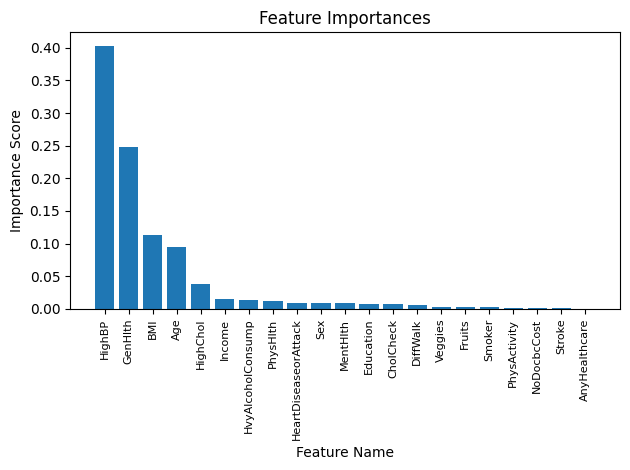

In [178]:
fnames = model4.feature_names_in_
importance = model4.feature_importances_
dfdata = pd.DataFrame({'feature': fnames, 'importance': importance})
sorted = dfdata.sort_values(by='importance',ascending=False)


plt.title("Feature Importances")
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.bar(sorted['feature'],sorted['importance'])
plt.xticks(rotation=90,size=8)
plt.tight_layout()

The most important variables here were:
- HighBP
- GenHlth
- BMI
- Age
- HighChol

Based on the correlation from EDA the features moving with the variable the most are:
- GenHlth
- HighBP
- BMI
- HighChol
- Age 
- DiffWalk

With a decision boundry of 0.21.